In [1]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    return math.dist(p,q)


In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    distance=_dist(p,q)
    
    if distance <= eps :
        return True
    else :
        return False

#_eps_neighborhood(a,b,6)

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(0,n_points):
        if _eps_neighborhood(m[:,point_id],m[:,i],eps) is True :
            seeds.append(i)
    
    return seeds


In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    seeds = _region_query(m, point_id, eps)
    
    #noise
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    
    else:
        classifications[point_id] = cluster_id
        #劃分到該群
        for n in seeds:
            classifications[n] = cluster_id
            
        while len(seeds) > 0:
            l = seeds[0]
            seed = _region_query(m, l, eps)
            if len(seed) >= min_points:
                for i in range(0, len(seed)):
                    seedpoint = seed[i]
                    if classifications[seedpoint] == UNCLASSIFIED or \
                       classifications[seedpoint] == NOISE:
                        if classifications[seedpoint] == UNCLASSIFIED:
                            seeds.append(seedpoint)
                        classifications[seedpoint] = cluster_id
            seeds = seeds[1:]
        return True
    

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for point_id in range(0,n_points) :
        point = m[:,point_id]
        if classifications[point_id] == UNCLASSIFIED :
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points) is True :
                cluster_id = cluster_id +1
        
    
    return classifications

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
#display(dataset_1)
m = np.asmatrix(dataset_1)
m = m.transpose()
'''display(m[:,1])
display(m[:,2])
display(m[:,3])
_region_query(m, 1, 1.6)'''

'display(m[:,1])\ndisplay(m[:,2])\ndisplay(m[:,3])\n_region_query(m, 1, 1.6)'

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

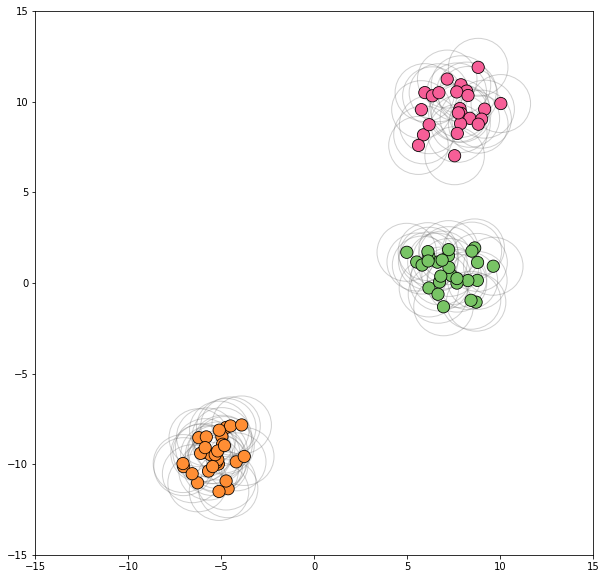

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [99]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [100]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

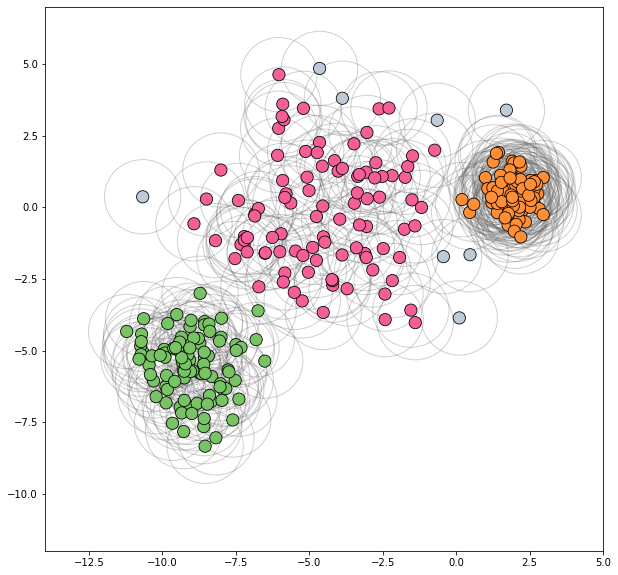

In [101]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)


In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

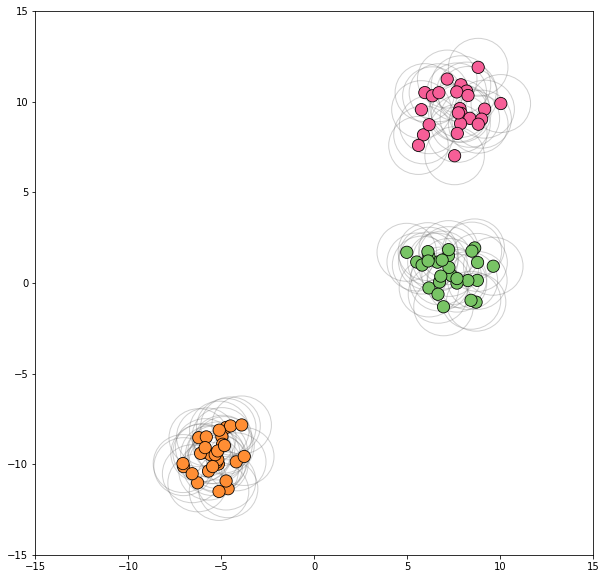

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

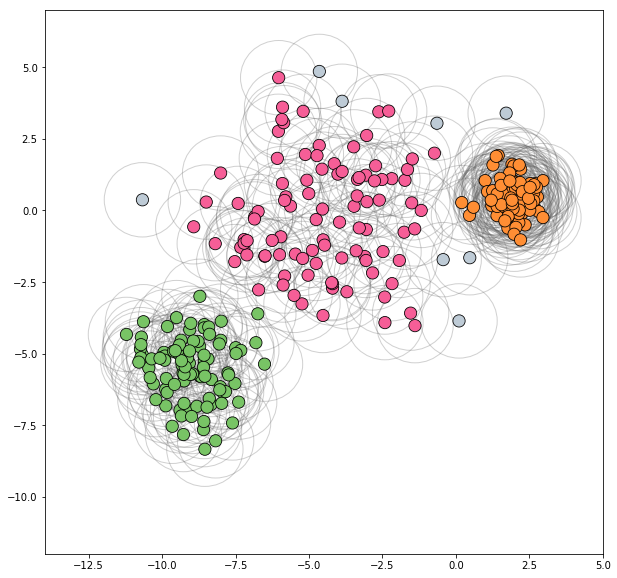

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
